In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imshow,imread
from skimage.color import rgb2yuv, rgb2hsv,rgb2gray,yuv2rgb,hsv2rgb
from scipy.signal import convolve2d

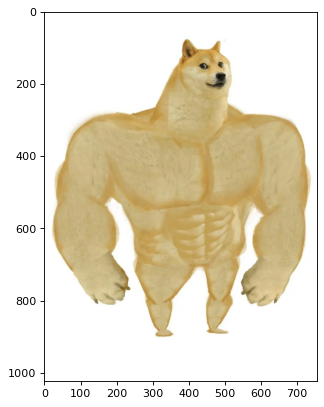

In [4]:
pic=imread('Desktop/deep learning exam/dog.jpeg')
plt.figure(figsize=(8,6),dpi=80)
plt.imshow(pic)

In [6]:
sharpen=np.array([[0,-1,0],
                  [-1,5,-1],
                  [0,-1,0]])

vertical=np.array([[-1,0,1],
                  [-2,0,2],
                    [-1,0,1]])

blurr=np.array([[0.11,0.11,0.11],
               [0.11,0.11,0.11],
               [0.11,0.11,0.11]])

gaussian=(1/16)*np.array([[1,2,1],
                        [2,4,2],
                         [1,2,1]])

Text(0.5, 1.0, 'blurr')

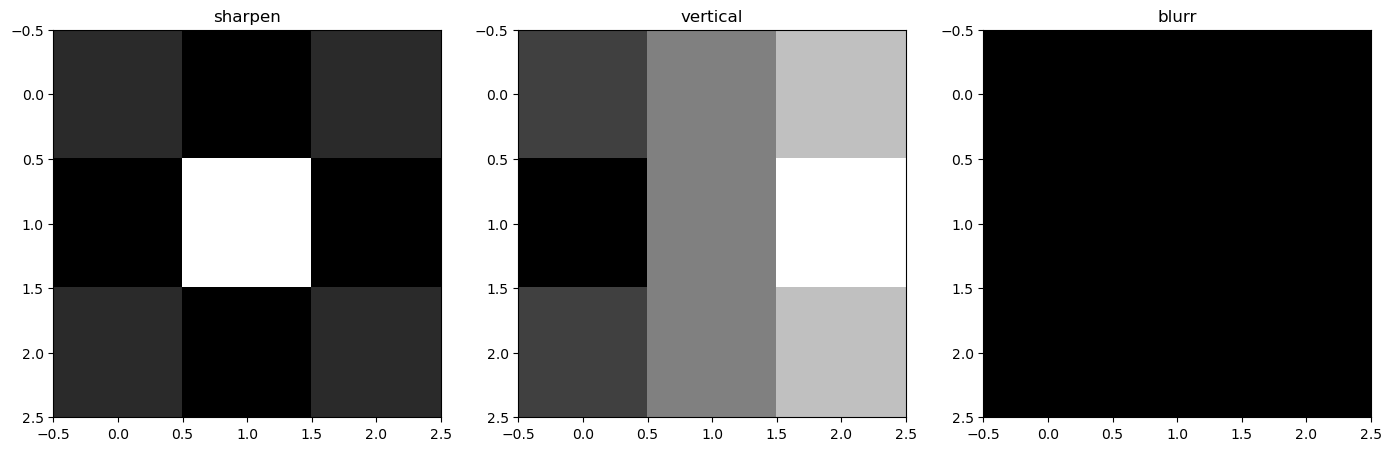

In [12]:
fig,ax=plt.subplots(1,3,figsize=(17,10))
ax[0].imshow(sharpen,cmap='gray')
ax[0].set_title("sharpen")
ax[1].imshow(vertical,cmap='gray')
ax[1].set_title("vertical")
ax[2].imshow(blurr,cmap='gray')
ax[2].set_title('blurr')

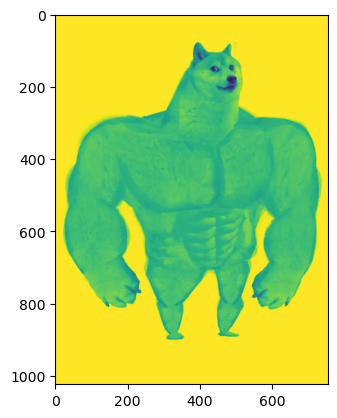

In [14]:
pic_gray=rgb2gray(pic)
plt.imshow(pic_gray)

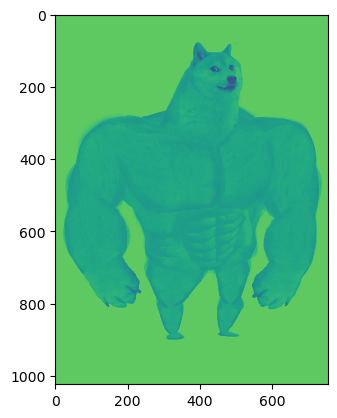

In [18]:
#appling multiple convolution

def multi_convolver(image,kernel,iteration):
    for i in range(iteration):
        image=convolve2d(image,kernel,mode="same",boundary='wrap')
    return image

convolved_image=multi_convolver(pic_gray,sharpen,1)
plt.imshow(convolved_image)

In [55]:
def convolver_rgb(image,kernel,iterations=1):
  convolved_image_r=multi_convolver(image[:,:,0],kernel,iterations)
  convolved_image_g=multi_convolver(image[:,:,1],kernel,iterations)
  convolved_image_b=multi_convolver(image[:,:,2],kernel,iterations)

  reformed_image = np.dstack((np.rint(abs(convolved_image_r)),np.rint(abs(convolved_image_g)),np.rint(abs(convolved_image_b))))/255

  fig,ax=plt.subplots(1,3,figsize=(17,10))
  ax[0].imshow(abs(convolved_image_r), cmap='Reds')
  ax[0].set_title(f'Red', fontsize=15)

  ax[1].imshow(abs(convolved_image_g), cmap='Greens')
  ax[1].set_title(f'Green', fontsize=18)

  ax[2].imshow(abs(convolved_image_b), cmap='Blues')
  ax[2].set_title(f'Blue', fontsize=18)

  return np.array(reformed_image*255).astype(np.uint8)

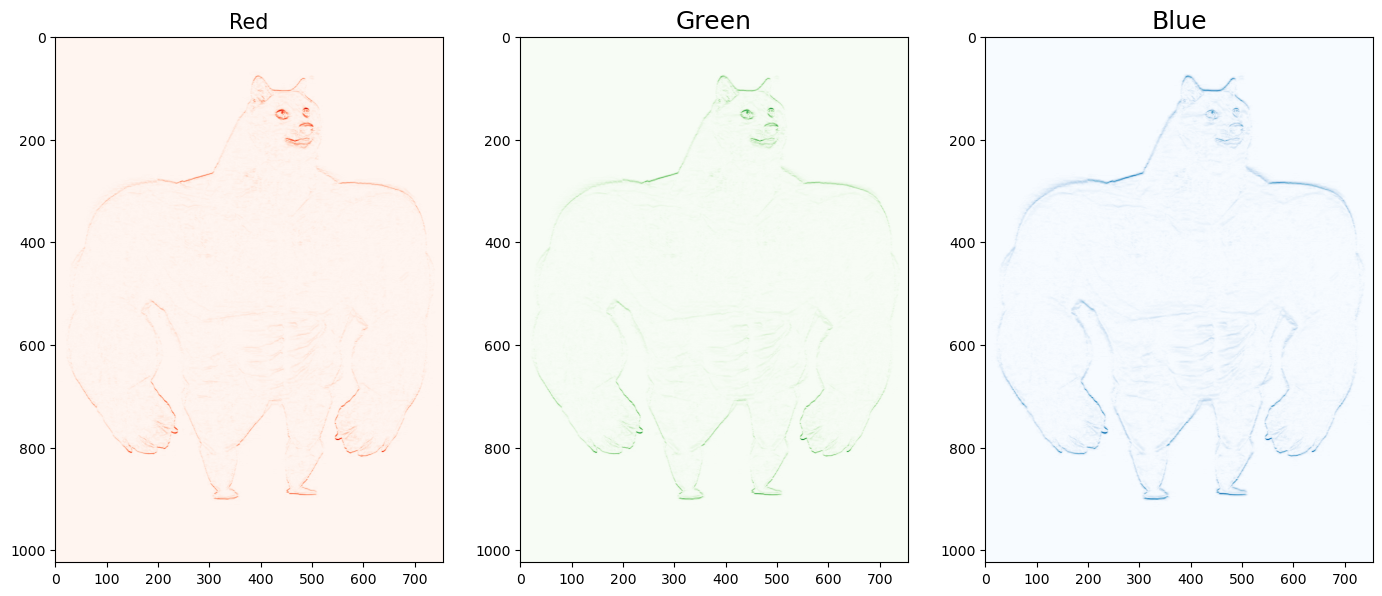

In [56]:
convolver_rgb_gauss=convolver_rgb(pic,vertical.T,1)

In [45]:
#parameter calculation 

from keras.models import Sequential
from keras.layers import Conv2D

model=Sequential()
model.add(Conv2D(32,input_shape=(28,28,3),kernel_size=(5,5),padding='same',use_bias=False))
model.add(Conv2D(17,kernel_size=(3,3),padding='same',use_bias=False))
model.add(Conv2D(13,kernel_size=(3,3),padding='same',use_bias=False))
model.add(Conv2D(7,kernel_size=(3,3),padding='same',use_bias=False))
model.compile(loss="categorical_crossentropy",optimizer='adam')
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 17)     │         4,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 13)     │         1,989 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 7)      │           819 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,104 (39.47 KB)

 Trainable params: 10,104 (39.47 KB)

 Non-trainable params: 0 (0.00 B)

In [49]:
from keras.models import Sequential
from keras.layers import Conv2D

model=Sequential()
model.add(Conv2D(32,input_shape=(28,28,3),kernel_size=(5,5),padding='same',use_bias=True))
model.add(Conv2D(17,(3,3),padding='same',use_bias=True))
model.add(Conv2D(13,(3,3),padding='same',use_bias=True))
model.add(Conv2D(7,(3,3),padding='same',use_bias=True))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 28, 28, 32)     │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 17)     │         4,913 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 28, 28, 13)     │         2,002 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 28, 28, 7)      │           826 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,173 (39.74 KB)

 Trainable params: 10,173 (39.74 KB)

 Non-trainable params: 0 (0.00 B)

In [51]:
from keras.models import Sequential 
from keras.layers import Conv2D

model=Sequential()
model.add(Conv2D(32,input_shape=(28,28,3),kernel_size=(5,5),padding='valid',use_bias=False))
model.add(Conv2D(17,kernel_size=(3,3),padding='valid',use_bias=False))
model.add(Conv2D(13,kernel_size=(3,3),padding='valid',use_bias=False))
model.add(Conv2D(7,kernel_size=(3,3),padding='valid',use_bias=False))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)              │ (None, 24, 24, 32)     │         2,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 22, 22, 17)     │         4,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 20, 20, 13)     │         1,989 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 18, 18, 7)      │           819 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,104 (39.47 KB)

 Trainable params: 10,104 (39.47 KB)

 Non-trainable params: 0 (0.00 B)

In [54]:
from keras.models import Sequential 
from keras.layers import Conv2D

model=Sequential()
model.add(Conv2D(10,input_shape=(28,28,3),kernel_size=(5,5),strides=(3,3),padding='valid',use_bias=False))
model.add(Conv2D(20,kernel_size=(3,3),strides=(2,2),padding='valid',use_bias=False))
model.add(Conv2D(40,kernel_size=(3,3),strides=(2,2),padding='valid',use_bias=False))
model.add(Conv2D(70,kernel_size=(3,3),strides=(2,2),padding='valid',use_bias=False))
model.compile(loss='categorical_crossentropy',optimizer='adam')
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_27 (Conv2D)              │ (None, 8, 8, 10)       │           750 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 3, 3, 20)       │         1,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 1, 1, 40)       │         7,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 0, 0, 70)       │        25,200 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,950 (136.52 KB)

 Trainable params: 34,950 (136.52 KB)

 Non-trainable params: 0 (0.00 B)

In [64]:
#max pooling
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D

x=tf.constant([[1.,2.,3.],[4.,5.,6.],[7.,8.,9.]])
print(x)
x=tf.reshape(x,[1,3,3,1])
max_2d=MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='valid')
max_2d(x)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]], shape=(3, 3), dtype=float32)


<tf.Tensor: shape=(1, 2, 2, 1), dtype=float32, numpy=
array([[[[5.],
         [6.]],

        [[8.],
         [9.]]]], dtype=float32)>

In [70]:
import tensorflow as tf 
from tensorflow.keras.layers import MaxPooling2D

x=tf.constant([[1.,2.,3.,4.],
               [5.,4.,3.,2.],
               [1.,1.,2.,3.]])
x=tf.reshape(x,[1,3,4,1])
max_2d=MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='valid')
max_2d(x)

<tf.Tensor: shape=(1, 1, 2, 1), dtype=float32, numpy=
array([[[[5.],
         [4.]]]], dtype=float32)>

In [71]:
import tensorflow as tf
from tensorflow.keras.layers import MaxPooling2D

x=tf.constant([[1,2,3,4],[4,5,6,7],[8,9,10,11]])
x=tf.reshape(x,[1,3,4,1])
max=MaxPooling2D(pool_size=(2,2),strides=(1,1),padding='same')
max(x)

<tf.Tensor: shape=(1, 3, 4, 1), dtype=int32, numpy=
array([[[[ 5],
         [ 6],
         [ 7],
         [ 7]],

        [[ 9],
         [10],
         [11],
         [11]],

        [[ 9],
         [10],
         [11],
         [11]]]])>